# Analyze a BigDFT run from a Logfile class

This small tutorial will show how to inspect the result of a BigDFT calculation from the `Logfile` class.
An instance of this class is returned after the execution of a calculator. 
Technically, such instance is constructed from the `yaml` file which is associated to the logfile of the actual run of the `bigdft` core executable.

For this reason, it is possible to inspect already existing runs by manually instantiating the class from a `yaml` logfile.
In order to do that we can load the Logfiles module:

In [1]:
install = "client (Google drive)" #@param ["full_suite", "client (Google drive)", "client"]
install_var=install
!wget https://gitlab.com/luigigenovese/bigdft-school/-/raw/main/packaging/install.py &> /dev/null
args={'locally': True} if install == 'client' else {}
import install
getattr(install,install_var.split()[0])(**args)

Mounted at /content/drive
Executing: mkdir -p /content/drive/MyDrive

Executing: git clone --depth 1 https://github.com/BigDFT-group/bigdft-school
Error Occurred:  
 fatal: destination path 'bigdft-school' already exists and is not an empty directory.

Executing: mkdir -p /content/drive/MyDrive/bigdft-school



In [2]:
from BigDFT import Logfiles as L
from os.path import join

datadir = 'bigdft-suite/PyBigDFT/source/notebooks/testfiles/'

Let us now load a file into a instance of a Logfile class. Imagine that our logfile corresponds to a single-point run, and it is present in a file named name `log-HBDMI.yaml`:


In [3]:
HBDMI = L.Logfile(join(datadir,'log-HBDMI.yaml'))

From this instance it is also possible to visualize the system associated

In [4]:
from BigDFT import Systems as S

sys = S.system_from_log(HBDMI,fragmentation='atomic')

In [5]:
from BigDFT.Visualization import get_atomic_colordict
sys.display(colordict=get_atomic_colordict(sys))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The run is now loaded. To inspect its behaviour we might print it down to inspect the usual information:

In [6]:
print(HBDMI)

- Atom types:
  - C
  - N
  - O
  - H
- cell: Free BC
- number_of_orbitals: 41
- posinp_file: HBDMI.xyz
- XC_parameter: 1
- grid_spacing: 0.3
- spin_polarization: 1
- total_magn_moment: 0
- system_charge: 0
- rmult:
  - 5.0
  - 8.0
- dipole:
  - -0.19551
  - -0.61908
  - -0.096593
- energy: -127.35074499502582
- fermi_level: -0.1921099447862
- forcemax: 0.01730347812308
- forcemax_cv: 0.0
- gnrm_cv: 0.0001
- nat: 28
- symmetry: disabled
- No. of KS orbitals:
  - 41



The above information can also be accessed separately, by having a look at the attributes of the HBDMI object:

In [7]:
list(HBDMI.__dict__) #you may also type: dir(HBDMI)

['label',
 'srcdir',
 'log',
 'number_of_orbitals',
 'posinp_file',
 'XC_parameter',
 'grid_spacing',
 'spin_polarization',
 'total_magn_moment',
 'system_charge',
 'rmult',
 'astruct',
 'data_directory',
 'dipole',
 'energy',
 'hartree_energy',
 'ionic_energy',
 'XC_energy',
 'trVxc',
 'evals',
 'forcemax',
 'forcemax_cv',
 'forces',
 'gnrm_cv',
 'memory_peak',
 'nat',
 'symmetry',
 'fermi_level',
 'memory']

Each of these attributes correspond to a specific quantity, which is documented in the [API](https://l_sim.gitlab.io/bigdft-suite/PyBigDFT/build/html/BigDFT.Logfiles.html).
We here refer to some examples with the aim of showing some tests.

We might consider to postprocess some of the variables for study of the system. Here an example:

In [8]:
print('The average energy per atom is:',HBDMI.energy/HBDMI.nat,\
    '(',HBDMI.energy,' Ha),',HBDMI.nat,' atoms)')
print('There are also,',HBDMI.evals[0].info,' (up,down) orbitals in the run (if nspin)') #fix wrt to nspin

The average energy per atom is: -4.548240892679494 ( -127.35074499502582  Ha), 28  atoms)
There are also, [41, 0]  (up,down) orbitals in the run (if nspin)


It is also possible to access directly the yaml serialization of the `bigdft` logfile with the `.log` attribute.

In [9]:
print(list(HBDMI.log))

['Code logo', 'Reference Paper', 'Version Number', 'Timestamp of this run', 'Root process Hostname', 'Number of MPI tasks', 'OpenMP parallelization', 'Maximal OpenMP threads per MPI task', 'MPI tasks of root process node', 'Compilation options', 'radical', 'outdir', 'logfile', 'run_from_files', 'dft', 'perf', 'lin_general', 'psolver', 'output', 'kpt', 'geopt', 'md', 'mix', 'sic', 'tddft', 'mode', 'lin_basis', 'lin_kernel', 'lin_basis_params', 'psppar.C', 'psppar.N', 'psppar.O', 'psppar.H', 'posinp', 'Data Writing directory', 'Atomic System Properties', 'Geometry Optimization Parameters', 'Material acceleration', 'DFT parameters', 'Basis set definition', 'Self-Consistent Cycle Parameters', 'Post Optimization Parameters', 'Properties of atoms in the system', 'Atomic structure', 'Box Grid spacings', 'Sizes of the simulation domain', 'High Res. box is treated separately', 'Poisson Kernel Initialization', 'Poisson Kernel Creation', 'Wavefunctions Descriptors, full simulation domain', 'Total

We might access the Density of States of this system:

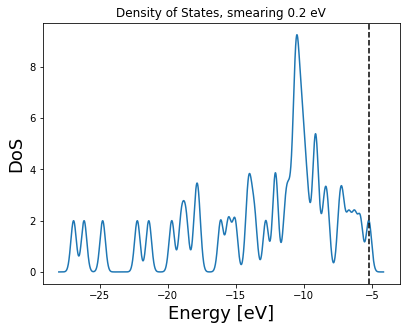

In [10]:
DoS = HBDMI.get_dos(label='HBDMI molecule')
ax = DoS.plot(sigma=0.2)
_ = ax.set_title('Density of States, smearing 0.2 eV')

It is also possible to inspect if the run have converged correctly.
The plot below shows the average wavefunction residue norm during the SCF iterations.

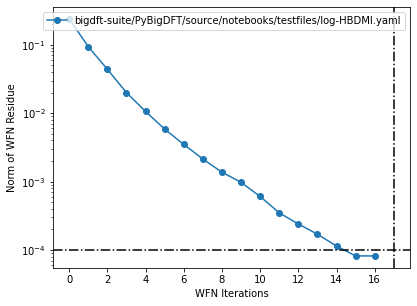

In [11]:
_ = HBDMI.SCF_convergence()

## Case of a periodic system

The above case was a Free BC molecule single point run. Let us now consider the case of a periodic calculation.
We take as an example a logfile coming from one run of the DeltaTest benchmark (see [this page](https://molmod.ugent.be/deltacodesdft) to know what it is all about). In any case, let us load the `log-K.yaml` file:

In [12]:
K = L.Logfile(join(datadir,'log-K.yaml'))
print(K)

- Atom types:
  - K
- cell:
  - 9.98888442684
  - 9.98888442684
  - 9.98888442684
- number_of_orbitals: 13
- XC_parameter: -101130
- grid_spacing:
  - 0.332966147561
  - 0.332966147561
  - 0.332966147561
- spin_polarization: 1
- total_magn_moment: 0
- rmult:
  - 10.0
  - 8.0
- dipole:
  - -42.025
  - -42.025
  - -42.025
- energy: -56.52301363451743
- fermi_level: 0.0609691899665294
- forcemax: 2.038812434232e-07
- forcemax_cv: 0.0
- gnrm_cv: 1e-08
- kpt_mesh:
  - 15
  - 15
  - 15
- nat: 2
- stress_tensor:
  - - 5.126601876834e-07
    - 3.529303946071e-23
    - -1.058791184314e-22
  - - 3.529303946071e-23
    - 5.126601876383e-07
    - -8.215933604291e-33
  - - -1.058791184314e-22
    - -8.215933604291e-33
    - 5.126601877667e-07
- symmetry: not prim.
- No. of KS orbitals per k-point:
  - 13



Here we can see that there are also other attributes available, like the $k$-points and the pressure (in GPa):

In [13]:
list(K.__dict__)

['label',
 'srcdir',
 'log',
 'number_of_orbitals',
 'XC_parameter',
 'grid_spacing',
 'spin_polarization',
 'total_magn_moment',
 'rmult',
 'astruct',
 'data_directory',
 'dipole',
 'energy',
 'hartree_energy',
 'ionic_energy',
 'XC_energy',
 'trVxc',
 'evals',
 'fermi_level',
 'forcemax',
 'forcemax_cv',
 'gnrm_cv',
 'kpts',
 'kpt_mesh',
 'memory_peak',
 'nat',
 'stress_tensor',
 'symmetry',
 'nkpt',
 'memory']

For example, the structural information can be accessed by:

In [14]:
K.astruct

{'cell': [9.98888442684, 9.98888442684, 9.98888442684],
 'positions': [{'K': [0.0, 0.0, 0.0]},
  {'K': [4.994442213, 4.994442213, 4.994442213]}],
 'Rigid Shift Applied (AU)': [0.0, 0.0, 0.0],
 'forces': [{'K': [1.721377403941e-25, 0.0, 0.0]},
  {'K': [1.721377403941e-25, 0.0, 0.0]}]}

Here we might also trace the density of states and the band structure, in a similar fashion:

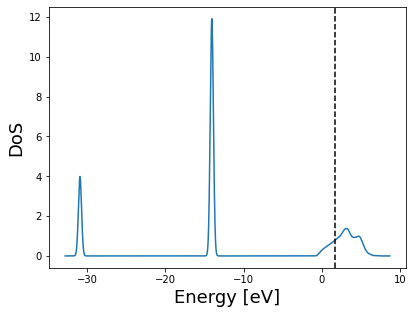

In [15]:
K.get_dos().plot()

## Writing band structures out of a converged system
The logfile, for periodic systems, can also be employed to write band structures.

In [ ]:
# install.packages('spglib','ase') # if this has not been done before

In [16]:
from BigDFT import BZ
BZ_K = K.get_brillouin_zone()

spacegroup Im-3m (229)
Lattice found: cubic


/content/drive/MyDrive/bigdft-school/install/lib/python3.7/site-packages/ase/dft/kpoints.py:655: UserWarning: Please call this function with cell as the first argument
  warnings.warn('Please call this function with cell as the first '


irreductible k-points 120
Interpolation bias 6.95567292478855e-09


(-1, 3)

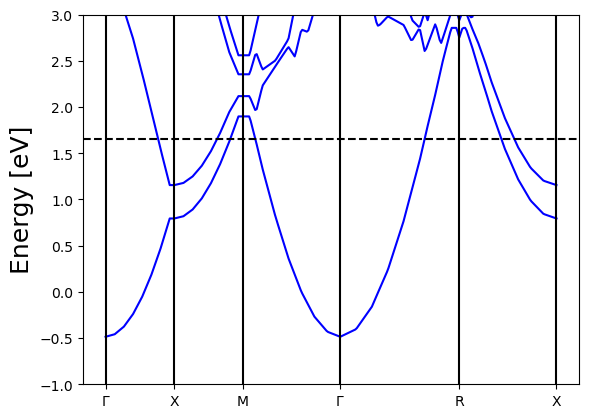

In [ ]:
ax = BZ_K.plot(npts=300)
ax.set_ylim([-1,3])

As an another example, we might inspect the $k$-points such as the $\Gamma$ point:

In [17]:
Gamma = K.kpts[0]
print(Gamma)

{'Rc': [0.0, 0.0, 0.0], 'Bz': [0.0, 0.0, 0.0], 'Wgt': 0.0003}


## Case of a Geometry optimization

For a geometry optimization the situation is similar, with the extra point that the code automatically recognize  multiple runs inside the logfile. Let us see the example of the following logfile:

In [18]:
geopt = L.Logfile(join(datadir,'GEOPT-all_sqnmbiomode.out.ref.yaml'))
print(geopt)

Found 11 different runs
- cell: Free BC
- number_of_orbitals: 7
- posinp_file: sqnmbiomode.xyz
- XC_parameter: 1
- grid_spacing:
  - 0.45
  - 0.45
  - 0.45
- spin_polarization: 1
- total_magn_moment: 0
- system_charge: 0
- rmult:
  - 5.0
  - 8.0
- energy: -14.900068217309986
- fermi_level: -0.2935133380623
- forcemax: 0.00376314
- forcemax_cv: 0.01
- force_fluct: 0.000771111
- gnrm_cv: 0.0001
- nat: 8
- symmetry: disabled
- No. of KS orbitals: []



The interesting point is that now the logfile can be iterated among the different geometry steps:

In [19]:
en = [l.energy for l in geopt]
for i,e in enumerate(en):
    print(i,e)

0 -14.896095253859464
1 -14.897377172313178
2 -14.898482433406212
3 -14.898861280172312
4 -14.899264325696496
5 -14.899589665247579
6 -14.899694268869062
7 -14.899781420570605
8 -14.899830568576757
9 -14.899987054521805
10 -14.900068217309986


The `geopt_plot` function allows to plot the relation beween energy and forces, where it can be also seen that the desired criterion is reached. Errorbars show the local fluctuation of the forces, an indication of the (cleaned) center of mass drift. See the example:

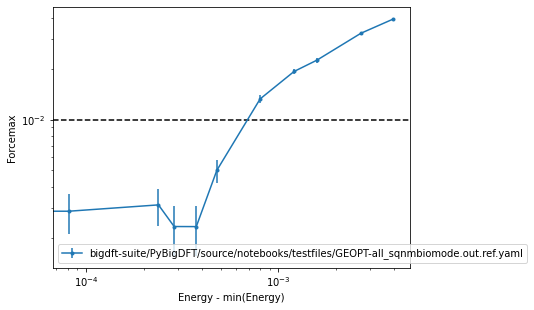

In [20]:
ax = geopt.geopt_plot()

In [21]:
sys_opt = S.system_from_log(geopt,fragmentation='full')
sys_start = S.system_from_log(geopt[0],fragmentation='full')
sys = [S.system_from_log(l,fragmentation='full') for l in geopt]

In [22]:
# show the start and last
sys_opt['START:0'] = sum(sys_start.values())
sys_opt.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

We can also see the animation of the geometry optimization

In [23]:
from BigDFT.Visualization import InlineVisualizer
viz=InlineVisualizer(400,300)
viz.display_system(*sys)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol